이미지 분류를 위한 데이터셋을 다운로드 해보고 불러와서 학습해봅시다

https://www.kaggle.com/datasets/gpiosenka/cats-in-the-wild-image-classification

파이토치에서 이미지 폴더를 쉽게 불러올 수 있는 기능을 제공합니다. 

https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

이때 폴더 구조는 아래의 형식과 같아야 합니다

```
data/
    train/
        cats/
            cat001.jpg
            cat002.jpg
            ...
        dogs/
            dog001.jpg
            dog002.jpg
            ...
    test/
        cats/
            cat001.jpg
            cat002.jpg
            ...
        dogs/
            dog001.jpg
            dog002.jpg
            ...
```

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
path = '/content/drive/MyDrive/Teaching/DL 202301/Cats'

ImageFolder 함수를 사용하여 데이터를 dataset 타입으로 불러옵니다

In [ ]:
train_data = datasets.ImageFolder(path + '/train', transform = transforms.ToTensor())
valid_data = datasets.ImageFolder(path + '/valid', transform = transforms.ToTensor())
test_data = datasets.ImageFolder(path + '/test', transform = transforms.ToTensor())

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 2339
    Root location: /content/drive/MyDrive/Teaching/DL 202301/Cats/train
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [ ]:
train_data[0]

(tensor([[[0.0667, 0.0706, 0.1333,  ..., 0.8627, 0.8471, 0.8471],
          [0.0431, 0.0941, 0.1098,  ..., 0.8431, 0.8510, 0.8980],
          [0.0078, 0.1333, 0.0627,  ..., 0.8353, 0.9373, 0.0039],
          ...,
          [0.1608, 0.1804, 0.1412,  ..., 0.7686, 0.7882, 0.7647],
          [0.1490, 0.1647, 0.1255,  ..., 0.7804, 0.7608, 0.7686],
          [0.2039, 0.1216, 0.0863,  ..., 0.7725, 0.7686, 0.7608]],
 
         [[0.0706, 0.0745, 0.1373,  ..., 0.8667, 0.8510, 0.8510],
          [0.0471, 0.0980, 0.1137,  ..., 0.8471, 0.8549, 0.9020],
          [0.0118, 0.1373, 0.0627,  ..., 0.8392, 0.9412, 0.0078],
          ...,
          [0.1216, 0.1412, 0.1098,  ..., 0.7922, 0.8196, 0.7922],
          [0.1098, 0.1255, 0.0941,  ..., 0.7961, 0.7843, 0.7961],
          [0.1647, 0.0824, 0.0549,  ..., 0.7882, 0.7922, 0.7843]],
 
         [[0.0510, 0.0549, 0.1176,  ..., 0.8824, 0.8667, 0.8667],
          [0.0275, 0.0784, 0.0941,  ..., 0.8627, 0.8706, 0.9176],
          [0.0000, 0.1176, 0.0549,  ...,

클래스 개수를 확인합니다. 

In [ ]:
train_data.class_to_idx

{'AFRICAN LEOPARD': 0,
 'CARACAL': 1,
 'CHEETAH': 2,
 'CLOUDED LEOPARD': 3,
 'JAGUAR': 4,
 'LIONS': 5,
 'OCELOT': 6,
 'PUMA': 7,
 'SNOW LEOPARD': 8,
 'TIGER': 9}

데이터를 살펴봅니다. 첫번째 이미지 한개만 살펴보겠습니다. 
이미지 shape을 확인합니다

In [ ]:
train_data[0][0].shape

torch.Size([3, 224, 224])

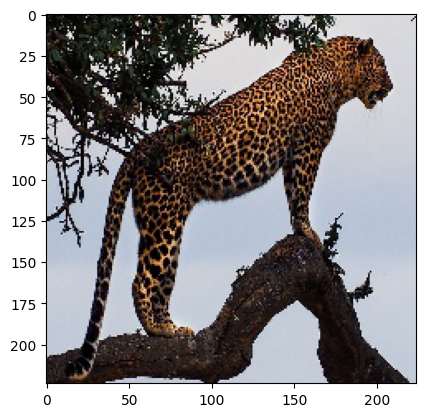

In [ ]:
import matplotlib.pyplot as plt
img = train_data[0][0].numpy().transpose(1,2,0)  # matplotlib 출력을 위해 W,H,C로 순서를 변경하였음
plt.imshow(img)

배치 사이지를 지정하고 데이터를 불러옵니다. 

이때 Shuffle을 사용하면, 이미지를 섞어서 랜덤하게 불러오게 됩니다

In [ ]:
import torch

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle =True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

mobilenet을 불러와서 학습해 보겠습니다. 

https://pytorch.org/vision/main/models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.MobileNet_V3_Small_Weights

In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

model = models.mobilenet_v3_small(weights=None, num_classes=10)  

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
from tqdm import tqdm

size = len(train_loader.dataset)  # 데이터셋 길이 확인
model.train()   # 모델을 훈련모드로 

epochs = 30
losses = []  # epoch마다 loss 변화 저장 변수
acces = []  # epoch마다 acc변화 저장 변수
losses_val = []  # epoch마다 loss 변화 저장 변수, valid_dataset
acces_val = []  # epoch마다 acc변화 저장 변수

for i in range(epochs):

  model.train() # 학습 모드
  train_loss, correct = 0, 0  # loss와 정확도 계산 목적
  for X, y in tqdm(train_loader): # tqdm으로 진행상황 확인 가능
      X, y = X.to(device), y.to(device) 

      # Compute prediction error
      pred = model(X)  # 예측 계산
      loss = loss_fn(pred, y)  # loss 계산
      train_loss += loss.item()  # loss 누적
      correct += (pred.argmax(1) == y).sum()  # 맞춘 개수 확인

      # Backpropagation
      optimizer.zero_grad()  # gradient 초기화
      loss.backward()   # gradient 계산
      optimizer.step()   # w,b 반영

  # train 데이터셋에 대한 정확도 계산                
  acc = correct/size  
  losses.append(loss.item())
  acces.append(acc.item())
  print('epoch:',i+1)
  print(f"loss: {train_loss:>7f}  acc:{acc:>5f}")

  # 에포크 마다, validation 데이터셋 정확도 계산
  valid_loss = 0
  valid_correct = 0

  model.eval()  # 평가용 모드
  with torch.no_grad(): 
    for x_val, y_val in valid_loader:  # vaildation set에서 정확도 평가
      x_val, y_val = x_val.to(device), y_val.to(device) 
      pred_val = model(x_val)
      valid_loss += loss_fn(pred_val, y_val).item()
      print(pred_val.shape, pred_val.argmax(1))
      valid_correct += (pred_val.argmax(1) == y_val).sum().item()

      break # 1개의 배치만 테스트(시간 때문에)

    valid_acc = valid_correct/(batch_size)  
    losses_val.append(valid_loss)
    acces_val.append(valid_acc)
    print(f"val_loss: {valid_loss:>7f}  val_acc:{valid_acc:>5f}")



100%|██████████| 74/74 [00:11<00:00,  6.48it/s]


epoch: 1
loss: 11.376459  acc:0.946986
torch.Size([32, 10]) tensor([1, 9, 9, 1, 9, 1, 6, 9, 7, 3, 8, 0, 3, 0, 4, 7, 7, 9, 1, 0, 9, 1, 6, 8,
        7, 6, 0, 1, 6, 1, 0, 6], device='cuda:0')
val_loss: 2.423362  val_acc:0.437500


100%|██████████| 74/74 [00:11<00:00,  6.62it/s]


epoch: 2
loss: 4.649632  acc:0.981616
torch.Size([32, 10]) tensor([7, 8, 0, 2, 3, 6, 1, 2, 6, 1, 4, 9, 8, 1, 8, 8, 1, 8, 6, 6, 2, 6, 0, 9,
        3, 7, 2, 3, 1, 2, 2, 7], device='cuda:0')
val_loss: 2.329075  val_acc:0.593750


100%|██████████| 74/74 [00:11<00:00,  6.65it/s]


epoch: 3
loss: 4.341915  acc:0.980334
torch.Size([32, 10]) tensor([6, 0, 7, 2, 9, 0, 9, 1, 8, 1, 0, 2, 6, 9, 7, 4, 0, 7, 1, 8, 2, 9, 0, 1,
        6, 1, 6, 7, 1, 1, 9, 4], device='cuda:0')
val_loss: 2.641184  val_acc:0.500000


100%|██████████| 74/74 [00:11<00:00,  6.63it/s]


epoch: 4
loss: 3.984408  acc:0.982044
torch.Size([32, 10]) tensor([4, 6, 4, 3, 0, 3, 2, 9, 0, 1, 7, 7, 1, 2, 3, 4, 3, 8, 3, 8, 9, 1, 7, 8,
        0, 5, 0, 2, 0, 7, 1, 6], device='cuda:0')
val_loss: 3.260840  val_acc:0.406250


100%|██████████| 74/74 [00:12<00:00,  5.98it/s]


epoch: 5
loss: 11.260287  acc:0.976486
torch.Size([32, 10]) tensor([8, 6, 2, 0, 3, 4, 8, 0, 4, 1, 7, 8, 0, 4, 0, 3, 2, 6, 4, 4, 5, 4, 4, 4,
        4, 7, 4, 2, 6, 8, 4, 1], device='cuda:0')
val_loss: 3.504085  val_acc:0.406250


 80%|███████▉  | 59/74 [00:08<00:02,  6.71it/s]


KeyboardInterrupt: ignored

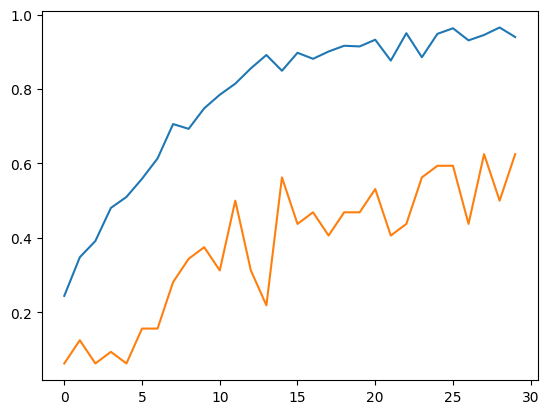

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acces)
plt.plot(acces_val)

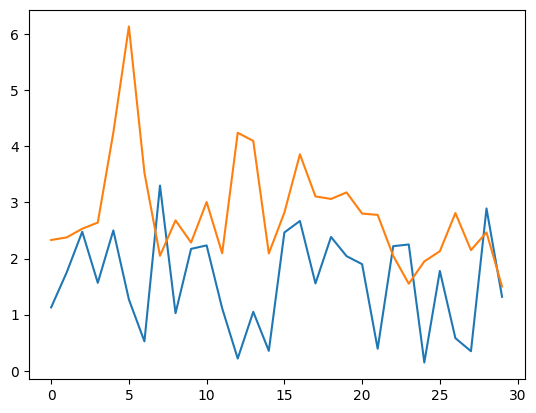

In [ ]:
plt.plot(losses)
plt.plot(losses_val)